# Score prediction


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.0.0'

## Setting Data

In [4]:
xy = np.loadtxt('../Day_1/data-01-test-score.csv', delimiter=',', dtype=np.float32)

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

print(x_train.shape, y_train.shape)


(25, 3) (25, 1)


## make a dataset

In [6]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))


In [8]:
W = tf.Variable(tf.random.normal([3, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

print(W,b)


<tf.Variable 'weight:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.3199434 ],
       [ 0.5206009 ],
       [-0.94628954]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-0.66993815], dtype=float32)>


In [9]:
def linear_regression(features):
    hypothesis  = tf.matmul(features, W) + b
    return hypothesis
  
print(linear_regression(x_train))

tf.Tensor(
[[-199.34944]
 [-258.61673]
 [-244.93628]
 [-266.9946 ]
 [-201.9064 ]
 [-151.72522]
 [-195.08586]
 [-137.331  ]
 [-246.54361]
 [-230.77689]
 [-193.3831 ]
 [-199.25233]
 [-253.07994]
 [-211.37654]
 [-198.8727 ]
 [-260.93503]
 [-206.92815]
 [-229.7362 ]
 [-238.3106 ]
 [-211.27992]
 [-231.29968]
 [-241.71558]
 [-218.85023]
 [-200.96233]
 [-264.86612]], shape=(25, 1), dtype=float32)


In [12]:
def loss_fn(hypothesis, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.00001)

In [13]:
epochs = 5000

for step in range(epochs):
  for features, labels in dataset:
    with tf.GradientTape() as tape:
      loss_value = loss_fn(linear_regression(features),labels)
      grads = tape.gradient(loss_value, [W,b])
      optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
      if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(linear_regression(features),labels)))

Iter: 0, Loss: 55075.5781
Iter: 100, Loss: 68.2053
Iter: 200, Loss: 63.7772
Iter: 300, Loss: 59.6837
Iter: 400, Loss: 55.8984
Iter: 500, Loss: 52.3970
Iter: 600, Loss: 49.1574
Iter: 700, Loss: 46.1587
Iter: 800, Loss: 43.3825
Iter: 900, Loss: 40.8111
Iter: 1000, Loss: 38.4290
Iter: 1100, Loss: 36.2212
Iter: 1200, Loss: 34.1743
Iter: 1300, Loss: 32.2761
Iter: 1400, Loss: 30.5150
Iter: 1500, Loss: 28.8807
Iter: 1600, Loss: 27.3634
Iter: 1700, Loss: 25.9541
Iter: 1800, Loss: 24.6449
Iter: 1900, Loss: 23.4282
Iter: 2000, Loss: 22.2969
Iter: 2100, Loss: 21.2448
Iter: 2200, Loss: 20.2658
Iter: 2300, Loss: 19.3547
Iter: 2400, Loss: 18.5063
Iter: 2500, Loss: 17.7161
Iter: 2600, Loss: 16.9797
Iter: 2700, Loss: 16.2933
Iter: 2800, Loss: 15.6532
Iter: 2900, Loss: 15.0561
Iter: 3000, Loss: 14.4988
Iter: 3100, Loss: 13.9786
Iter: 3200, Loss: 13.4927
Iter: 3300, Loss: 13.0388
Iter: 3400, Loss: 12.6145
Iter: 3500, Loss: 12.2178
Iter: 3600, Loss: 11.8468
Iter: 3700, Loss: 11.4996
Iter: 3800, Loss: 11.

In [14]:
print(W, b)

<tf.Variable 'weight:0' shape=(3, 1) dtype=float32, numpy=
array([[0.02941771],
       [0.81190485],
       [1.1772228 ]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-0.6564682], dtype=float32)>


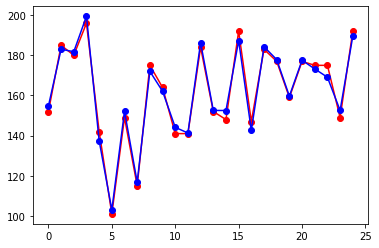

In [15]:
hypothesis= linear_regression(x_train)

plt.plot(y_train, 'o-', color='red')
plt.plot(hypothesis.numpy(), 'o-', color='blue')
plt.show()